In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# only get data jobs in US
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()

# drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

587611     72500.0
398467     65000.0
236163    138500.0
506513    110000.0
255910    100694.0
303453    118640.0
603255     87855.0
94968      84305.0
763442     66053.0
439783    115000.0
Name: salary_year_avg, dtype: float64

<Axes: >

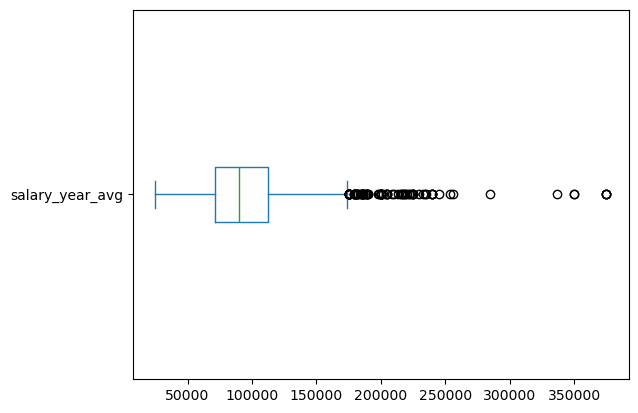

In [8]:
# pandas to plot
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\Mei\AppData\Local\Temp\ipykernel_49032\1960811324.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


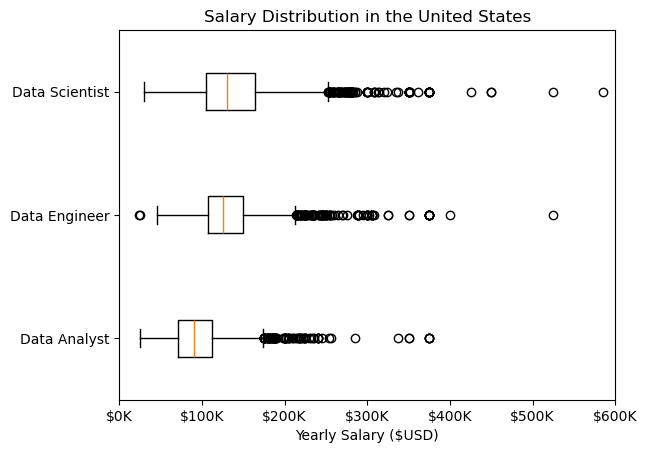

In [27]:
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# matplotlib to plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
df_US = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short']).isin(job_titles)
].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

# Data Scientist Hourly Salary Box Plot

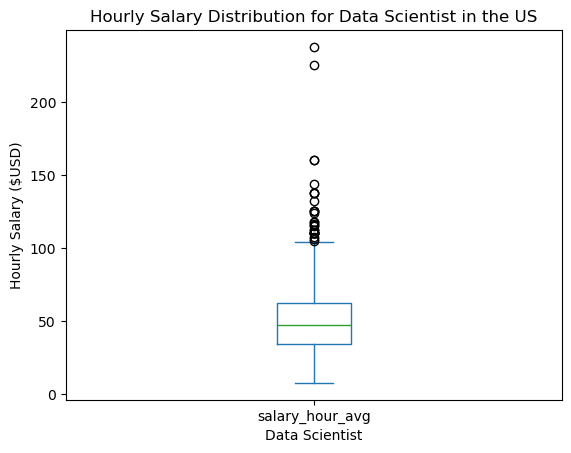

In [37]:
ds_df = df[
    (df['job_country'] == 'United States')&
    (df['job_title_short'] == 'Data Scientist')
]

ds_df['salary_hour_avg'].plot(
    kind='box'
)

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

# Comparison of Hourly Salaries for Data Analyst

C:\Users\Mei\AppData\Local\Temp\ipykernel_49032\1990750039.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=countries)


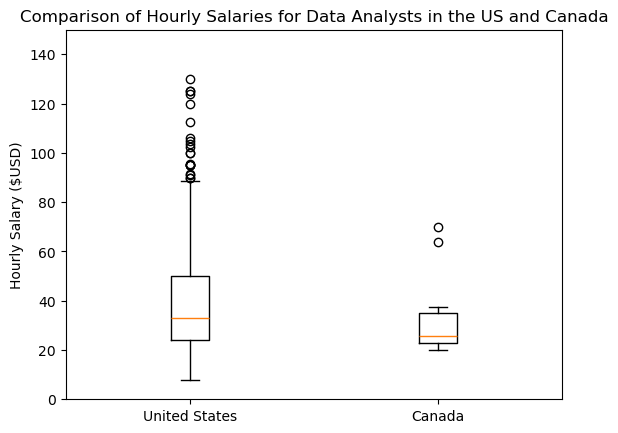

In [66]:
countries = ['United States', 'Canada']

nrth_america_df = df[
    (df['job_country'].isin(countries))&
    (df['job_title_short'] == 'Data Analyst')
].dropna(subset=['salary_hour_avg'])

country_list = [
    nrth_america_df[nrth_america_df['job_country'] == country]['salary_hour_avg'] for country in countries
    ]
plt.boxplot(country_list, labels=countries)
plt.ylim(0,150)
plt.ylabel('Hourly Salary ($USD)')
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

# Comparison of Hourly Salaries in Canada

C:\Users\Mei\AppData\Local\Temp\ipykernel_49032\2330811459.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


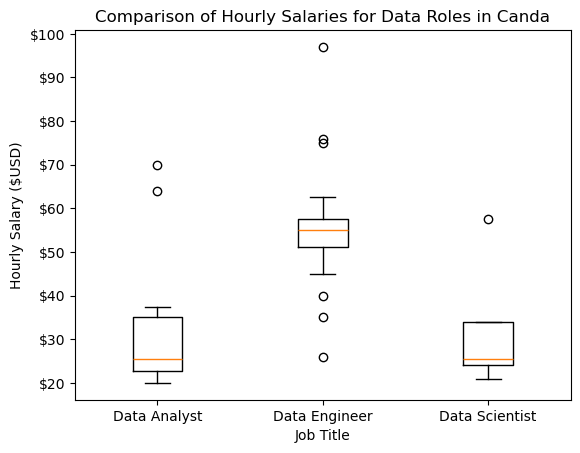

In [85]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

CA_df = df[
    (df['job_country'] == 'Canada') &
    (df['job_title_short'].isin(job_titles))
].dropna(subset=['salary_hour_avg'])

job_list = [
    CA_df[CA_df['job_title_short'] == job_title]
    ['salary_hour_avg'] for job_title in job_titles
]

fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canda')
plt.show()
